# Boosting I-94 Traffic Efficiency: Key Influencing Factors

## Introduction

This project aims to analyze the westbound traffic on the I-94 Interstate highway, focusing on data collected by a station situated midway between Minneapolis and Saint Paul. The primary goal is to identify key indicators of heavy traffic, such as weather conditions, time of day, and day of the week. The analysis leverages traffic volume data to discern patterns and trends that can inform better traffic management strategies for this specific stretch of highway.

To achieve this, we employ a range of analytical techniques using Python and its libraries, including Pandas, Matplotlib, and Seaborn. Our approach includes examining summary statistics, histogram distributions, and time-based patterns to isolate factors that significantly influence traffic volume. 

Key findings indicate that traffic volumes peak during morning and evening rush hours on business days, with notable dips during nighttime and weekends. Weather conditions, particularly "Light rain and snow" and "Shower snow," are associated with higher traffic volumes, though the overall correlation with weather factors remains weak. These insights are intended to aid in optimizing traffic management and efficiency for westbound traffic near the data collection station.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset into a DataFrame
data_raw = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
# Display the first few rows of the dataset to understand its structure
data_raw.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
# Get a concise summary of the dataset, including data types and non-null counts
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
# Convert the 'date_time' column to datetime format
data_raw['date_time'] = pd.to_datetime(data_raw['date_time'])

/Users/dimitar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


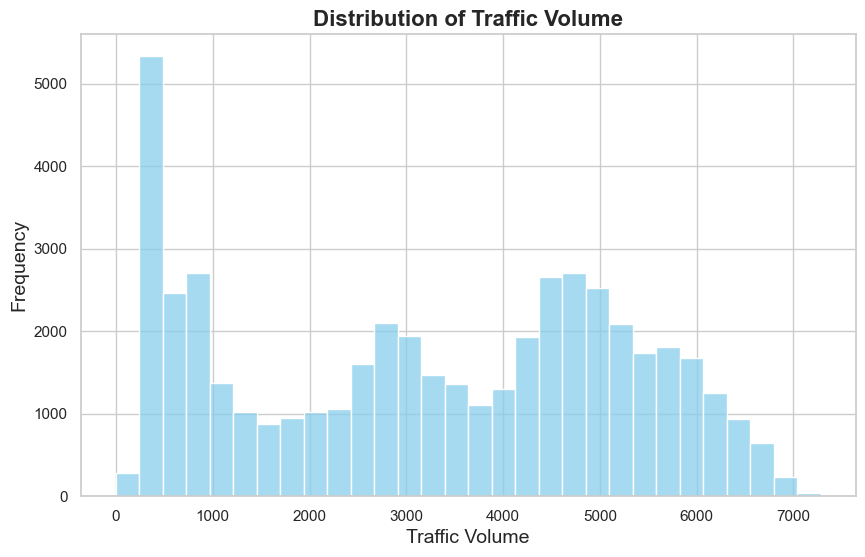

In [6]:
import seaborn as sns
sns.set_theme()

# Set Seaborn style
sns.set(style='whitegrid')

# Plotting the distribution of traffic volume with Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a histogram with Seaborn
sns.histplot(
    data=data_raw, 
    x='traffic_volume', 
    bins=30, 
    color='skyblue'
)

# Adding title and labels with custom font sizes and styles
plt.title('Distribution of Traffic Volume', fontsize=16, fontweight='bold')
plt.xlabel('Traffic Volume', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.show()  # Render the plot to visualize the distribution of traffic volume

In [7]:
data_raw['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

## Observations on Traffic Volume Distribution

### Summary Statistics
- **Count**: There are 48,204 entries for traffic volume, indicating a substantial dataset.
- **Mean**: The average traffic volume is approximately 3,260 vehicles per hour.
- **Standard Deviation**: The standard deviation is around 1,987 vehicles, suggesting significant variability in traffic volume.
- **Min and Max**: The traffic volume ranges from 0 to 7,280 vehicles per hour.
- **Percentiles**:
  - 25th percentile (Q1): 1,193 vehicles per hour, indicating that 25% of the data has traffic volume less than 1,193.
  - 50th percentile (Median): 3,380 vehicles per hour, suggesting that half of the data has traffic volume less than 3,380.
  - 75th percentile (Q3): 4,933 vehicles per hour, meaning 25% of the data has traffic volume greater than 4,933.

## Observations from the Histogram

### Distribution Shape
- The histogram shows a multimodal distribution with several peaks, indicating that traffic volume has multiple common values or modes.

### High Frequency at Zero
- There is a significant number of observations with a traffic volume of zero. This could indicate periods with no traffic, possibly during nighttime or due to other factors.

### Peaks and Troughs
- The first peak is at the very beginning, indicating many instances of zero traffic volume.
- Another noticeable peak occurs around the 4000-5000 range.

### Spread of Data
- The data is spread across a wide range of values, with noticeable frequencies up to the maximum observed traffic volume (~7000 vehicles).

## Insights and Hypothesis

### Daytime vs. Nighttime Influence
- The high frequency of zero traffic volume entries likely corresponds to nighttime periods when traffic is minimal or non-existent.

### Rush Hours
- The peaks around 4000-5000 could represent rush hour traffic during daytime, when traffic volume is highest.

To further investigate the influence of daytime and nighttime on traffic volume, we should segment the data by time of day and compare the traffic volume distributions for these segments. This will help us confirm whether the observed patterns are indeed related to the time of day.

In [8]:
data_raw.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [9]:
# Extract daytime data (6 AM to 8 PM)
daytime_data = data_raw[(data_raw['date_time'].dt.hour >= 6) & (data_raw['date_time'].dt.hour <= 20)]

# Extract nighttime data (before 6 AM or after 8 PM)
nighttime_data = data_raw[(data_raw['date_time'].dt.hour < 6) | (data_raw['date_time'].dt.hour > 20)]

/Users/dimitar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dimitar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


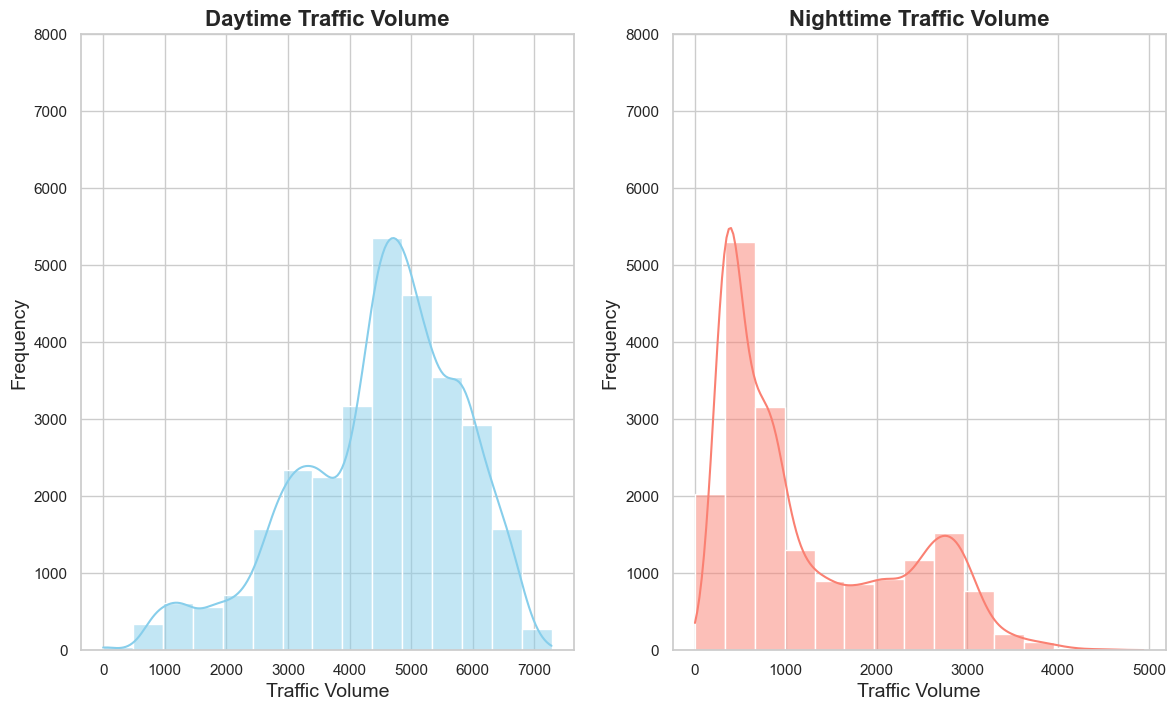

In [10]:
# Create a figure with two subplots for daytime and nighttime traffic volumes
plt.figure(figsize=(14, 8))

# Daytime traffic volume histogram
plt.subplot(1, 2, 1)
sns.histplot(daytime_data['traffic_volume'], bins=15, kde=True, color='skyblue')
plt.title('Daytime Traffic Volume', fontsize=16, fontweight='bold')
plt.xlabel('Traffic Volume', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.ylim(0, 8000)

# Nighttime traffic volume histogram
plt.subplot(1, 2, 2)
sns.histplot(nighttime_data['traffic_volume'], bins=15, kde=True, color='salmon')
plt.title('Nighttime Traffic Volume', fontsize=16, fontweight='bold')
plt.xlabel('Traffic Volume', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.ylim(0, 8000)

# Display the plot
plt.show()

### Analysis of Daytime and Nighttime Traffic Volumes

#### Daytime Traffic Volume
- **Count**: 29,904 entries
- **Mean**: Approximately 4,494 vehicles per hour
- **Standard Deviation**: 1,331 vehicles per hour
- **Min and Max**: Traffic volume ranges from 0 to 7,280 vehicles per hour
- **Percentiles**:
  - 25th percentile (Q1): 3,656 vehicles per hour
  - 50th percentile (Median): 4,677 vehicles per hour
  - 75th percentile (Q3): 5,445 vehicles per hour

**Histogram Shape**: 
The daytime traffic histogram has a left-skewed distribution, with a prominent peak in the range of 4000-5000 vehicles per hour, indicating that most of the traffic volumes are concentrated in this range. This suggests that heavy traffic is more common during the day.

#### Nighttime Traffic Volume
- **Count**: 18,300 entries
- **Mean**: Approximately 1,244 vehicles per hour
- **Standard Deviation**: 974 vehicles per hour
- **Min and Max**: Traffic volume ranges from 0 to 4,939 vehicles per hour
- **Percentiles**:
  - 25th percentile (Q1): 412 vehicles per hour
  - 50th percentile (Median): 842 vehicles per hour
  - 75th percentile (Q3): 2,044 vehicles per hour

**Histogram Shape**: 
The nighttime traffic histogram is right-skewed with a heavy concentration of traffic volumes towards the lower end of the spectrum. There is a significant number of entries with very low traffic volumes, indicating that most of the time, traffic is light during nighttime hours. 

### Interpretation
- **Daytime Traffic**: The daytime traffic volume is generally higher and shows more variability. The left-skewed distribution with a peak around 4000-5000 vehicles per hour suggests that heavy traffic is common during the day. 
- **Nighttime Traffic**: The nighttime traffic volume is significantly lower on average, with a large proportion of entries having very low traffic volumes. This suggests that traffic is light during the night, and heavy traffic is relatively rare. 

### Indicators of Heavy Traffic
Given that our goal is to find indicators of heavy traffic, the nighttime data, which predominantly shows light traffic, may not be as useful. Here’s why:
- **Low Variability**: The nighttime traffic data shows less variability and a lower mean traffic volume, indicating that it is less likely to capture instances of heavy traffic.
- **Focus on Daytime**: Since heavy traffic is more prevalent during the day, focusing on the daytime data will likely yield more relevant insights and indicators of heavy traffic patterns.

### Conclusion
To effectively identify indicators of heavy traffic, it is more appropriate to concentrate on the daytime data. The daytime traffic volume shows higher variability and a greater frequency of higher traffic volumes, making it more suitable for analysis aimed at understanding and predicting heavy traffic conditions.

In [11]:
daytime_data = daytime_data.copy()
daytime_data['month'] = daytime_data['date_time'].dt.month.astype(int)

In [12]:
monthly_traffic = daytime_data.groupby('month').agg({'traffic_volume': 'mean'})

/Users/dimitar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dimitar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


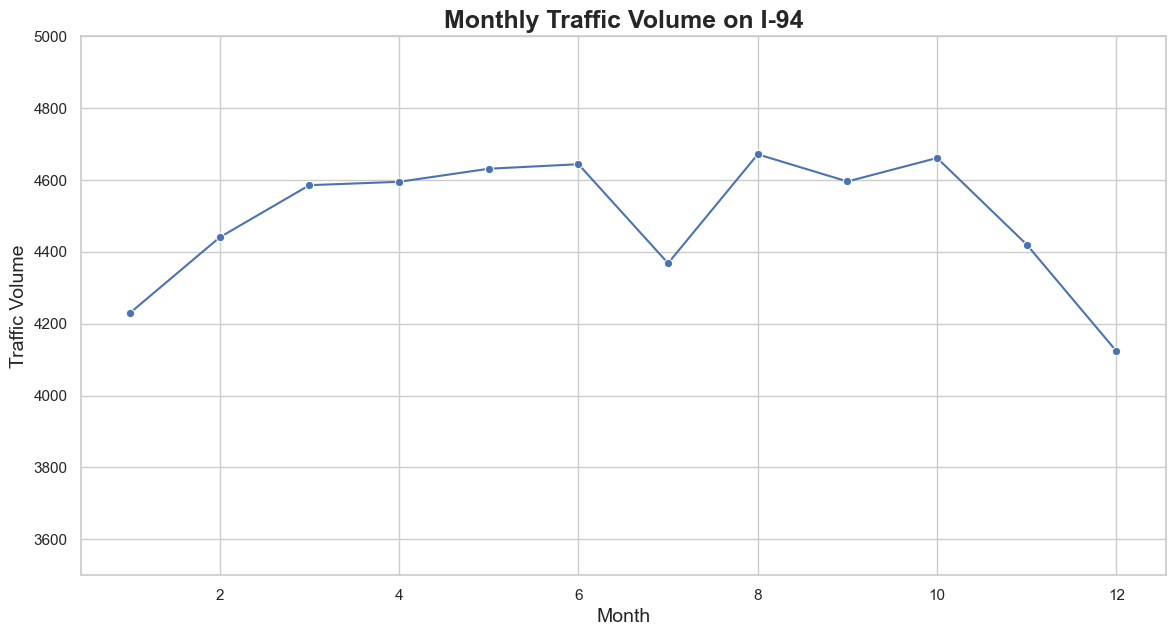

In [13]:
# Create the line plot with Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_traffic, x=range(1,13), y='traffic_volume', marker='o', color='b')

# Set plot title and labels
plt.title('Monthly Traffic Volume on I-94', fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)

# Set the y-axis limit
plt.ylim(3500, 5000)

# Show the plot
plt.show()

### Analysis of Monthly Traffic Volume on I-94

The line plot visualizing the average monthly traffic volume on I-94 reveals several key insights and interesting patterns:

1. **Overall Trend**: The traffic volume shows an overall increase from January through June. The values are generally stable from March to June with minor fluctuations.

2. **Summer Dip**: There is a noticeable dip in traffic volume in July. This could be due to several factors such as vacations or road construction, leading to reduced traffic.

3. **Late Summer Recovery**: Following the dip in July, there is a significant recovery in August, where the traffic volume increases to one of the highest levels in the year.

4. **Fall Stability**: Traffic volume remains relatively stable from August through November, showing minor fluctuations.

5. **December Drop**: Another notable pattern is the sharp decrease in traffic volume in December. This drop could be attributed to the holiday season when many people may be off work or traveling away from the city.

### Exception Observed

- **July Dip**: The most interesting exception is the significant drop in traffic volume in July. It stands out as an anomaly when compared to the generally stable and increasing trend seen in other months. This anomaly might warrant further investigation to understand the underlying causes such as seasonal events, weather conditions, or other external factors affecting traffic.

In [14]:
daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek.astype(int)
daily_traffic = daytime_data.groupby('dayofweek').agg({'traffic_volume': 'mean'})

/Users/dimitar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dimitar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


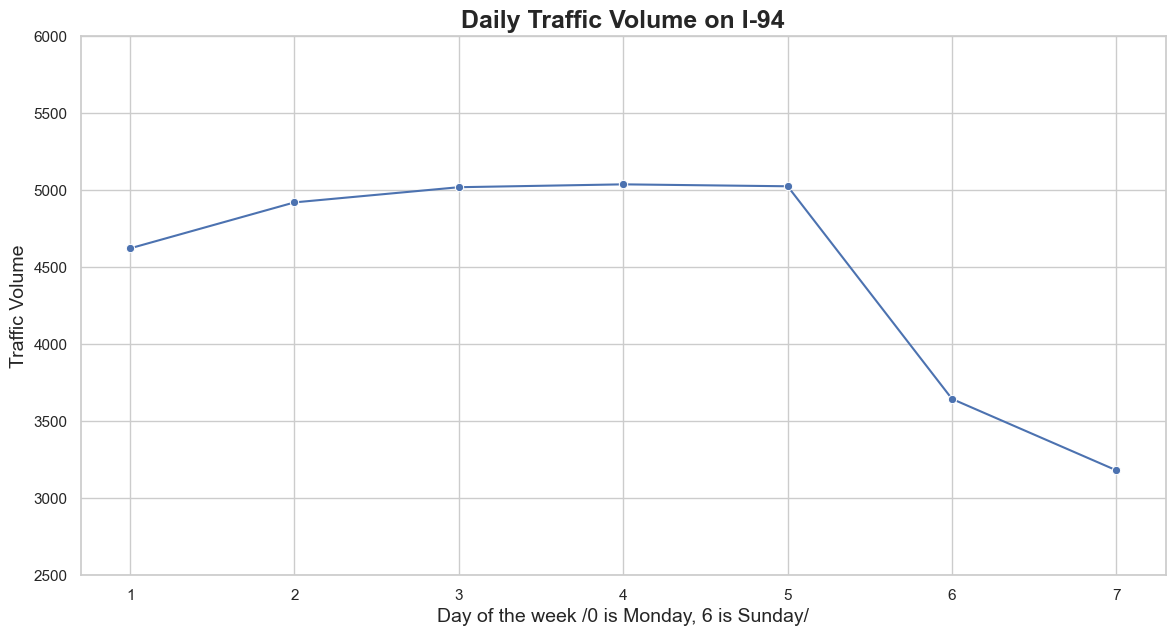

In [15]:
# Create the line plot with Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_traffic, x=range(1,8), y='traffic_volume', marker='o', color='b')

# Set plot title and labels
plt.title('Daily Traffic Volume on I-94', fontsize=18, weight='bold')
plt.xlabel('Day of the week /0 is Monday, 6 is Sunday/', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)

# Set the y-axis limit
plt.ylim(2500, 6000)

# Show the plot
plt.show()

### Analysis of Daily Traffic Volume on I-94

The line plot visualizing the average daily traffic volume on I-94 provides insights into the differences between business days and the weekend:

1. **Business Days**:
   - **Higher Traffic Volume**: The traffic volume is consistently higher on business days (Monday to Friday). 
   - **Peak Days**: Tuesday, Wednesday, and Thursday exhibit the highest traffic volumes, suggesting these are peak traffic days.
   - **Monday and Friday**: While still higher than weekends, Monday and Friday show slightly lower traffic volumes compared to midweek days. This could be due to flexible work schedules or remote working on these days.

2. **Weekend Days**:
   - **Lower Traffic Volume**: There is a noticeable drop in traffic volume during the weekends (Saturday and Sunday).
   - **Sunday**: Sunday has the lowest traffic volume of the week, indicating significantly reduced traffic activity.

### Differences Between Business Days and the Weekend

- **Higher Weekday Traffic**: The traffic volume during business days is substantially higher compared to weekends. This indicates that the majority of traffic on I-94 is likely related to commuting for work and business activities.
- **Weekend Drop**: The sharp decline in traffic volume during the weekend suggests reduced commuting, with people either staying home or engaging in leisure activities that do not require using the I-94 highway.

### Conclusion

The analysis of the daily traffic volume highlights a clear distinction between business days and weekends, with significantly higher traffic on weekdays due to work-related commuting. This information can be crucial for traffic management and planning, allowing authorities to implement strategies that address peak traffic periods more effectively.

In [16]:
daytime_data['hour'] = daytime_data['date_time'].dt.hour.astype(int)

bussiness_days = daytime_data.loc[daytime_data['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_data.loc[daytime_data['dayofweek'] >= 5] # 5 == Saturday

by_hour_business = bussiness_days.groupby('hour').agg({'traffic_volume': 'mean'})
by_hour_weekend = weekend.groupby('hour').agg({'traffic_volume': 'mean'})

/Users/dimitar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dimitar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dimitar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dimitar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

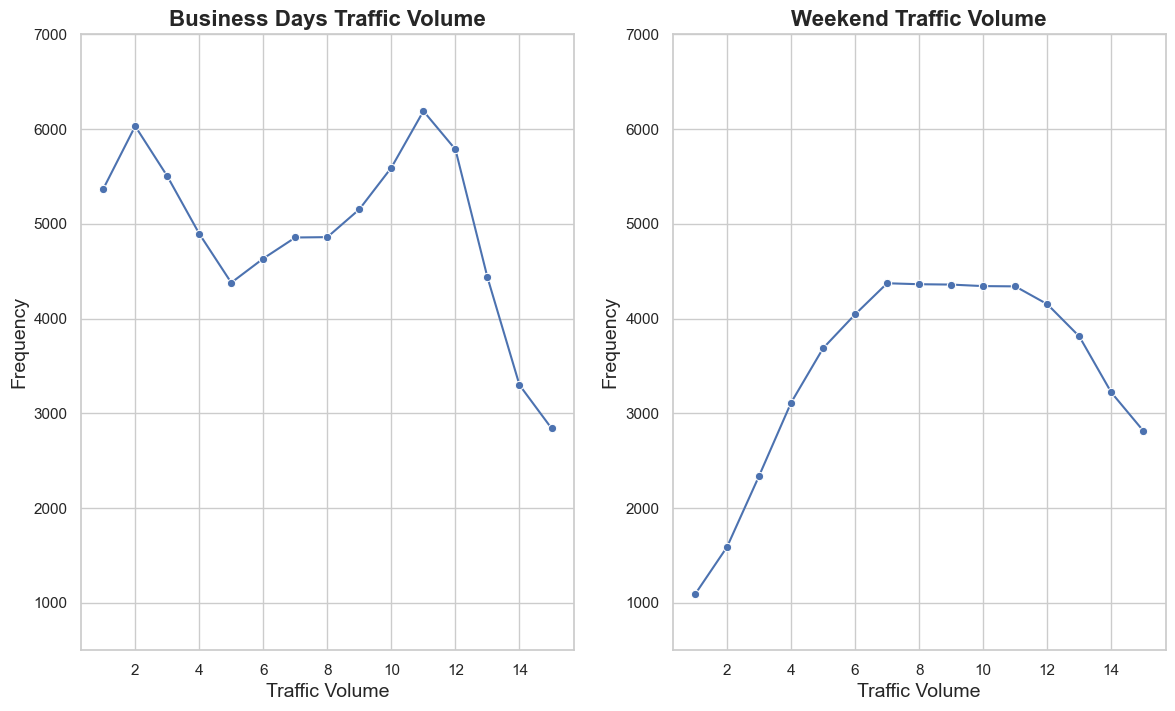

In [17]:
# Create a figure with two subplots for daytime and nighttime traffic volumes
plt.figure(figsize=(14, 8))

# Daytime traffic volume histogram
plt.subplot(1, 2, 1)
sns.lineplot(data=by_hour_business, x=range(1,16), y='traffic_volume', marker='o', color='b')
plt.title('Business Days Traffic Volume', fontsize=16, fontweight='bold')
plt.xlabel('Traffic Volume', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.ylim(500, 7000)

# Nighttime traffic volume histogram
plt.subplot(1, 2, 2)
sns.lineplot(data=by_hour_weekend, x=range(1,16), y='traffic_volume', marker='o', color='b')
plt.title('Weekend Traffic Volume', fontsize=16, fontweight='bold')
plt.xlabel('Traffic Volume', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.ylim(500, 7000)

# Display the plot
plt.show()

### Analysis of Traffic Volume by Time of Day

The grid chart visualizes the changes in traffic volume by time of day for both business days and weekends. Here is a detailed analysis of both charts:

#### Business Days Traffic Volume

- **Rush Hours**:
  - **Morning Rush Hour**: Traffic volume peaks between 6 AM and 9 AM, with the highest point around 7-8 AM. This suggests that many commuters are traveling to work during this time.
  - **Evening Rush Hour**: Another significant peak occurs between 3 PM and 6 PM, with the highest traffic volume around 4-5 PM, indicating the time when people are commuting back home from work.
- **Midday Lull**: Traffic volume decreases between the morning and evening rush hours, remaining relatively steady but lower during midday (10 AM to 2 PM). This period likely reflects regular business operations with fewer commuters on the road.
- **Nighttime Drop**: After 7 PM, traffic volume starts to decrease significantly, indicating fewer vehicles on the road during late evening and nighttime.

#### Weekend Traffic Volume

- **No Clear Rush Hours**: Unlike business days, weekends do not show distinct rush hour peaks. Instead, the traffic volume is more evenly distributed throughout the day.
- **Moderate Morning Activity**: There is a slight increase in traffic volume starting around 8 AM, reaching a moderate level by mid-morning (10 AM). This suggests that weekend activities start a bit later compared to weekdays.
- **Steady Afternoon Volume**: Traffic volume remains relatively stable from late morning (10 AM) through the afternoon (4 PM), indicating a steady flow of vehicles likely related to leisure and errands.
- **Evening Decrease**: Similar to business days, there is a decline in traffic volume during the evening hours, though the decrease starts a bit earlier around 5-6 PM.

### Comparison of Business Days and Weekends

- **Peak Traffic Differences**: Business days exhibit clear morning and evening rush hours, while weekends show a more consistent traffic pattern without distinct peaks.
- **Overall Volume**: Traffic volume on business days is generally higher during peak hours compared to weekends.
- **Time Shift**: Weekend traffic starts later in the morning and remains steady, reflecting different travel behavior focused more on leisure activities than on work commutes.

### Conclusion

Understanding the differences in traffic volume by time of day between business days and weekends can help in planning and managing traffic flow more effectively. Business days have pronounced rush hours that require targeted interventions, while weekends have more distributed traffic that might benefit from different management strategies.

### Summary of Findings: Time Indicators for Heavy Traffic on I-94

Based on the analysis of traffic volume data on I-94, several time-based patterns indicating heavy traffic have been identified. These findings are crucial for traffic management, planning, and optimization.

#### 1. Daily Traffic Volume Patterns

**Business Days vs. Weekends**:
- **Business Days**:
  - **Morning Rush Hour**: 6 AM to 9 AM, peaking around 7-8 AM.
  - **Evening Rush Hour**: 3 PM to 6 PM, peaking around 4-5 PM.
  - **Midday Lull**: Lower traffic volume between 10 AM and 2 PM.
  - **Nighttime Drop**: Significant decrease in traffic after 7 PM.
- **Weekends**:
  - **Moderate Morning Activity**: Starts increasing around 8 AM, stabilizing by 10 AM.
  - **Steady Afternoon Volume**: Consistent traffic from 10 AM to 4 PM.
  - **Evening Decrease**: Traffic volume declines starting around 5-6 PM.
  - **No Clear Rush Hours**: More evenly distributed traffic throughout the day.

#### 2. Monthly Traffic Volume Patterns

- Traffic volume shows fluctuations across different months.
- Generally higher traffic volume during warmer months (April to October) compared to colder months (November to March).
- Notable exceptions:
  - **July**: Slight dip in traffic, potentially due to vacations or holidays.
  - **December**: Lower traffic volume, possibly influenced by winter weather and holidays.

#### 3. Hourly Traffic Volume Patterns

- **Morning Rush Hour**: Traffic starts increasing sharply from 6 AM, reaching its peak between 7-8 AM.
- **Midday Plateau**: After the morning rush, traffic volume levels off and remains relatively stable throughout the day.
- **Evening Rush Hour**: Another increase in traffic volume occurs between 3 PM and 6 PM, with a peak around 4-5 PM.
- **Nighttime Lull**: Traffic volume decreases significantly after 7 PM, remaining low throughout the night.

### Conclusion

The analysis highlights specific time periods with heavy traffic, providing key insights for traffic management:
- **Morning and Evening Rush Hours on Business Days**: Targeted interventions such as traffic signal optimization, public transport promotion, and congestion pricing can be implemented.
- **Consistent Midday and Evening Traffic on Weekends**: Different strategies might be needed to manage leisure-related traffic compared to weekday commuter traffic.
- **Monthly Variations**: Understanding seasonal traffic patterns can aid in planning maintenance and infrastructure projects.

These findings can help in optimizing traffic flow, reducing congestion, and improving overall transportation efficiency on I-94.

In [18]:
daytime_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29904 entries, 0 to 48200
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              0 non-null      object        
 1   temp                 29904 non-null  float64       
 2   rain_1h              29904 non-null  float64       
 3   snow_1h              29904 non-null  float64       
 4   clouds_all           29904 non-null  int64         
 5   weather_main         29904 non-null  object        
 6   weather_description  29904 non-null  object        
 7   date_time            29904 non-null  datetime64[ns]
 8   traffic_volume       29904 non-null  int64         
 9   month                29904 non-null  int64         
 10  dayofweek            29904 non-null  int64         
 11  hour                 29904 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 3.0+ MB


In [19]:
# Select relevant columns
weather_traffic_data = daytime_data[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']]

# Compute the correlation matrix
correlation_matrix = weather_traffic_data.corr()

# Extract the correlation values between traffic_volume and the other columns
traffic_correlation = correlation_matrix['traffic_volume']

# Display the correlation values
print(correlation_matrix)


                traffic_volume      temp   rain_1h   snow_1h  clouds_all
traffic_volume        1.000000  0.111003  0.003911  0.005850   -0.023713
temp                  0.111003  1.000000  0.010010 -0.017146   -0.124111
rain_1h               0.003911  0.010010  1.000000 -0.000059    0.004805
snow_1h               0.005850 -0.017146 -0.000059  1.000000    0.025442
clouds_all           -0.023713 -0.124111  0.004805  0.025442    1.000000


### Correlation Analysis of Traffic Volume and Weather Conditions
Based on the correlation matrix provided, here are the correlation values between `traffic_volume` and the numerical weather columns:
- `temp`: 0.111003
- `rain_1h`: 0.003911
- `snow_1h`: 0.005850
- `clouds_all`: -0.023713

### Conclusion
None of the numerical weather columns (`temp`, `rain_1h`, `snow_1h`, `clouds_all`) show a strong correlation with `traffic_volume`. The correlation values are all close to zero, suggesting that these weather conditions are not reliable indicators for predicting heavy traffic. Temperature has the highest correlation with traffic volume, but the relationship is still weak (0.111003).

This analysis suggests that other factors, such as time of day, day of the week, or specific weather conditions described in the categorical columns (`weather_main`, `weather_description`), might be more influential in determining traffic volume.

In [20]:
by_weather_main = daytime_data.groupby('weather_main').agg({'traffic_volume': 'mean'})
by_weather_description = daytime_data.groupby('weather_description').agg({'traffic_volume': 'mean'})

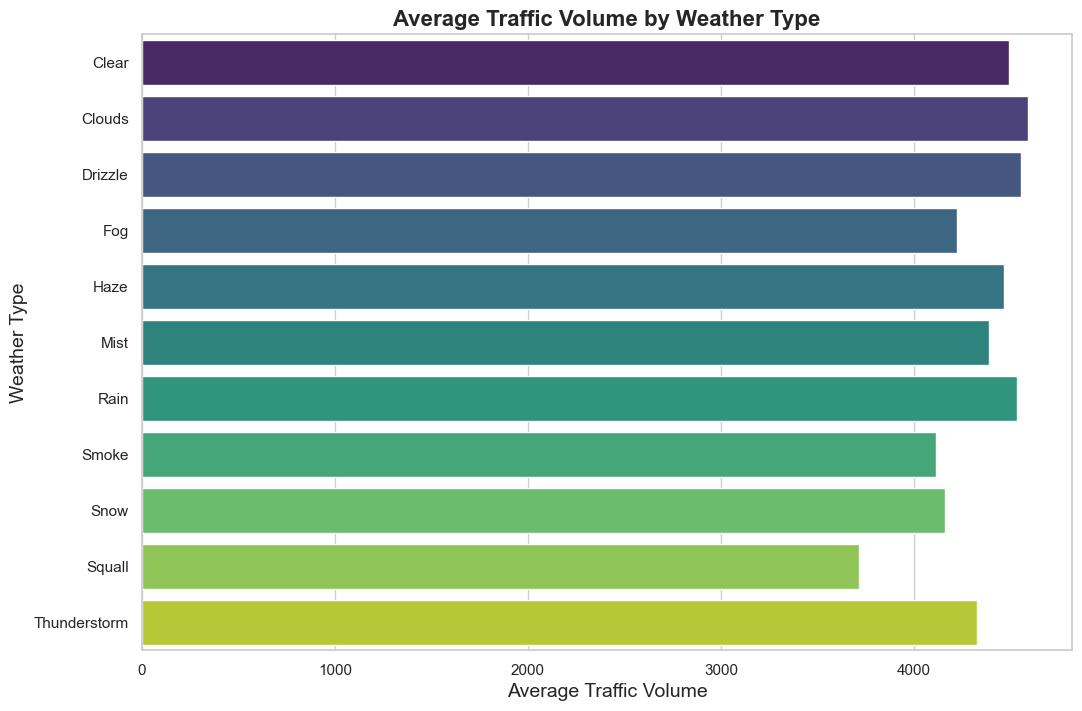

In [21]:
# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=by_weather_main['traffic_volume'], y=by_weather_main.index, palette='viridis')
plt.title('Average Traffic Volume by Weather Type', fontsize=16, fontweight='bold')
plt.xlabel('Average Traffic Volume', fontsize=14)
plt.ylabel('Weather Type', fontsize=14)
plt.show()

### Analysis of Average Traffic Volume by Weather Type

Based on the horizontal bar plot:

- There are no weather types where the average traffic volume exceeds 5,000 cars. This suggests that weather type alone might not be a strong indicator of heavy traffic volume.
- Some weather types show higher average traffic volumes than others, but the differences are not substantial enough to indicate a specific weather type as a clear heavy traffic indicator.
- More detailed analysis may be needed, possibly incorporating other variables or looking at combinations of factors to identify conditions under which heavy traffic occurs.

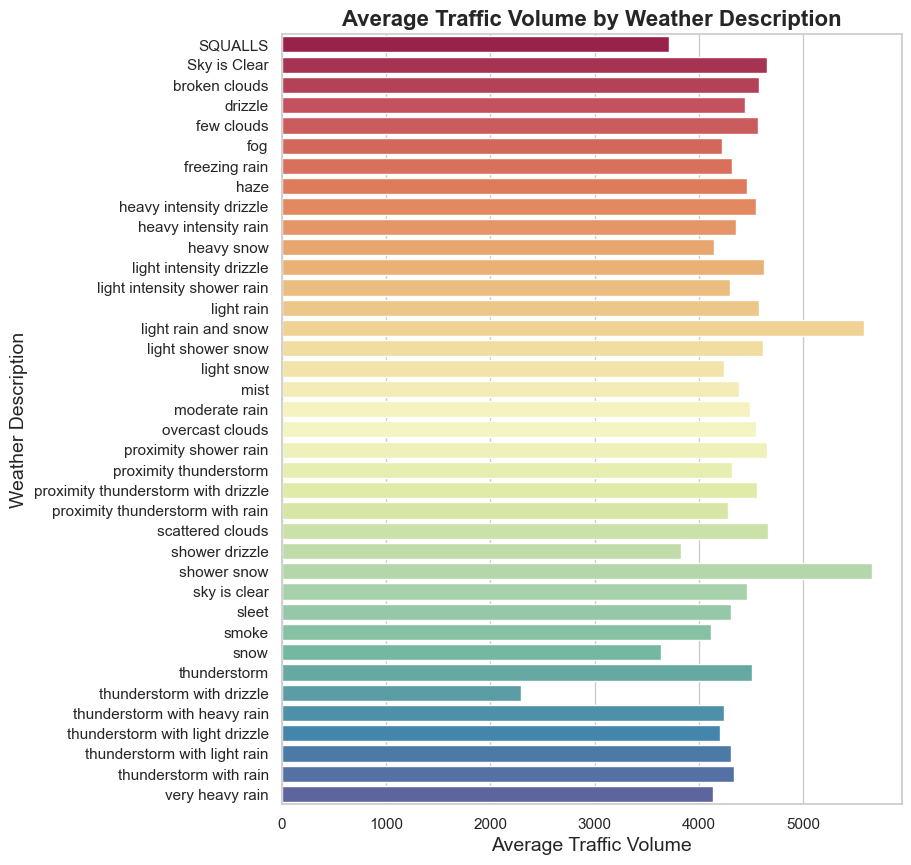

In [22]:
# Create the horizontal bar plot
plt.figure(figsize=(8, 10))
sns.barplot(x=by_weather_description['traffic_volume'], y=by_weather_description.index, palette='Spectral')
plt.title('Average Traffic Volume by Weather Description', fontsize=16, fontweight='bold')
plt.xlabel('Average Traffic Volume', fontsize=14)
plt.ylabel('Weather Description', fontsize=14)
plt.show()

### Analysis of Average Traffic Volume by Weather Description

Based on the horizontal bar plot and the provided dataset:

- **Traffic Volume Exceeding 5,000 Cars**: 
  - There are a few weather descriptions where the average traffic volume exceeds 5,000 cars. These are:
    - Light rain and snow: 5579.75 cars
    - Shower snow: 5664.00 cars

- **Heavy Traffic Indicators**:
  - The weather descriptions "Light rain and snow" and "Shower snow" stand out as potential indicators of heavy traffic, given their average traffic volumes exceeding 5,000 cars.
  - Most other weather descriptions do not show traffic volumes exceeding 5,000 cars, suggesting that they might not be as strong indicators of heavy traffic.

### Observations:
- **High Traffic Volumes**:
  - "Light rain and snow" and "Shower snow" have significantly higher average traffic volumes compared to other weather descriptions, indicating that these weather conditions might contribute to heavy traffic on I-94.
  - Other weather descriptions such as "Sky is Clear," "Scattered clouds," and "Proximity shower rain" have average traffic volumes in the range of 4,500 to 4,700 cars but do not exceed the 5,000-car threshold.

- **Overall Trend**:
  - The majority of weather descriptions have average traffic volumes below 5,000 cars, indicating that weather type alone might not be a strong predictor of heavy traffic.
  - Further analysis might be needed to explore combinations of weather conditions and other factors (e.g., time of day, day of the week) to better understand their impact on traffic volume.

### Conclusion:
- **Potential Indicators**:
  - "Light rain and snow" and "Shower snow" are potential indicators of heavy traffic as they exceed the 5,000 cars threshold.
  - Other weather descriptions might not serve as strong indicators of heavy traffic, but they still influence traffic volumes to varying degrees.

## Conclusion

This project set out to identify key indicators of heavy traffic on the westbound stretch of I-94 near the station located between Minneapolis and Saint Paul. By analyzing traffic volume data using Python and its data analysis libraries, we focused on understanding the influence of various factors, including time of day, day of the week, and weather conditions.

Our findings reveal that traffic volumes are highest during the morning and evening rush hours on business days, with lower volumes during nighttime and weekends. Weather conditions, particularly "Light rain and snow" and "Shower snow," correlate with increased traffic but show only a weak overall impact. These results offer insights for improving traffic management specific to the westbound direction near this station and should not be generalized to the entire I-94 highway.